*Project -- SALES DATA ANALYSIS FOR RETAIL DOMAIN

- SALE IS LIVE PRODUCT
        BUSINESS USE CASE

-STATISTIC INTRODUCTION:
        POPULATION - large group of People (Data) (ex-WOrld) |
        SAMPEL - randomly pick some of individual (ex- COuntry)

------------------------------------------------------------------------------------------------------------------

-- *1st Concept - DESCRIPTIVE STATISTICTCS
        Describe the Statistic of the dataset

        MEAN - avg of numbers
        MEDIAN - mid point of Numbers (n+1/2)
        MODE - Frequency of the number
        VARIANCE - (Spread the data towards mean) Varience measures the dispersion of a set of data points around their mean.
        STANDARD DEVIANCE - root of varience (Standard Deviation is the most common measure of veriability for a SINGLE DATASET)

**DESCRIPTIVE STATISTICTS ALWAYS PLAY WITH NUMBERS

------------------------------------------------------------------------------------------------------------------

- *2ND CONCEPT - INFERENTIAL STATS:
        IT ALWAYS DEAL WITH PROBABILITY AND DISTRIBUTION

        --distribution graphs create from probability

        roll 1 dice --uniform distributions (uniform dist- same level)

        roll 2 dice -- Normal DIstribution(0 Symmetry) (Normal Distribution == Gausian Distribution == Bell Currve )
------------------------------------------------------------------------------------------------------------------

- 3rd CONCEPT - CONFIDENCE INTERVAL -->
        10th class when board exam - 95% confident I am saying math mark I will get this test is (90-95)
        95% confident error -- 5% == 5/100 = 0.05
        95% confident --- interval (90-95)
                     90 - lower Interval (estimator)
                     95 - Upper Interval (estimator)
                     mean - (90+95)/2 (estimates)

write an exam --- you got 94% (accept the hypothesis(Hypothesis is an idea that can be tested.)) |
got % (without the interval) -- Regect the null hypothesis test

        5% (you have from the error confidence) == 0.05 --> p-value

------------------------------------------------------------------------------------------------------------------
Hypothesis TEsting -->

Hyd 1 apple is expensive --- statement
        null hypothesis (H0)
        altrnative hypotheis (H1 or Ha)
call to your friend does 1 apple cost is = 500
     few apple if avg apple cost is 500
          if avg apple cost is 120
          accept the null hypothesis. ==  closer towards the mean
          reject the null hypothesis. == far from the mean

        1 apple - 100 rs
        1 apple - 600 rs

------------------------------------------------------------------------------------------------------------------
population data -- (z-test)
sample data -- (t-test)

for example --- Tata 2024 year
        95% hypothesis test what would by confidence Interval
        t-score find | 
        (mean - me, mean + me)


**Starting the project

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Create a dataset

np.random.seed(42) #random number wont be generated again and again

#create a dataset

data = {
    'product_id': range(1,21),
    'Product_name': [f'Product_{i}' for i in range(1,21)],
    "category": np.random.choice(['Electronics', 'Clothing', 'Home', 'Books'], size=20),
    "unit_sold": np.random.poisson(lam=20, size=20),
    "sales_date": pd.date_range(start='2025-01-01', periods=20, freq='D')

}

#display the dataset
sales_data = pd.DataFrame(data)
print("Sales Data:\n", sales_data)


Sales Data:
     product_id Product_name     category  unit_sold sales_date
0            1    Product_1         Home         25 2025-01-01
1            2    Product_2        Books         15 2025-01-02
2            3    Product_3  Electronics         17 2025-01-03
3            4    Product_4         Home         19 2025-01-04
4            5    Product_5         Home         21 2025-01-05
5            6    Product_6        Books         17 2025-01-06
6            7    Product_7  Electronics         19 2025-01-07
7            8    Product_8  Electronics         16 2025-01-08
8            9    Product_9         Home         21 2025-01-09
9           10   Product_10     Clothing         21 2025-01-10
10          11   Product_11         Home         17 2025-01-11
11          12   Product_12         Home         22 2025-01-12
12          13   Product_13         Home         14 2025-01-13
13          14   Product_14         Home         17 2025-01-14
14          15   Product_15        Books  

In [3]:
#save the dataframe to a CSV file
sales_data.to_csv('sales_data.csv', index=False)

In [4]:
#Descriptive Statistics

discriptive_stats = sales_data['unit_sold'].describe()
print("\nDescriptive Statistics for 'unit_sold':\n", discriptive_stats)

#finding some ststs info from the dataset
mean_sales = sales_data['unit_sold'].mean()
median_sales = sales_data['unit_sold'].median()
mode_sales = sales_data['unit_sold'].mode()[0]
varience_sales = sales_data['unit_sold'].var()
std_deviation_sales = sales_data['unit_sold'].std()

category_stats = sales_data.groupby('category')['unit_sold'].agg(['sum','mean', 'median', 'var', 'std']).reset_index()

#display the result
print("\n Statistical Analysis of 'unit_sold':")
print(f"Mean unit sold: {mean_sales}")
print(f"Median unit sold: {median_sales}")
print(f"Mode unit sold: {mode_sales}")
print(f"Varience unit sold: {varience_sales}")
print(f"standard Deviation unit sold: {std_deviation_sales}")

print("\n Category Statisticts:")
print(category_stats)



Descriptive Statistics for 'unit_sold':
 count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: unit_sold, dtype: float64

 Statistical Analysis of 'unit_sold':
Mean unit sold: 18.8
Median unit sold: 18.5
Mode unit sold: 17
Varience unit sold: 10.90526315789474
standard Deviation unit sold: 3.3023117899275864

 Category Statisticts:
      category  sum       mean  median        var       std
0        Books  101  16.833333    17.0   7.366667  2.714160
1     Clothing   21  21.000000    21.0        NaN       NaN
2  Electronics   73  18.250000    18.0   4.916667  2.217356
3         Home  181  20.111111    21.0  13.861111  3.723051


In [5]:
#Inferential Statistics

#This code gives the  range of unit sold for the mean of 'unit_sold' at 95% confidence level

confidence_level = 0.95
degrees_freedom = len(sales_data['unit_sold']) - 1

sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['unit_sold']))

#t-score for the confidence level
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\n Confidence Interval for mean 'unit_sold': \n", confidence_interval)



 Confidence Interval for mean 'unit_sold': 
 (np.float64(17.254470507823573), np.float64(20.34552949217643))


In [6]:
#Hypothesis Testing
t_statistic, p_value = stats.ttest_1samp(sales_data['unit_sold'], popmean=20)
print(f"\n T-statistic: {t_statistic}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The average unit sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The average unit sold is not significantly different from 20.")


 T-statistic: -1.6250928099424466, P-value: 0.12061572226781002
Fail to reject the null hypothesis: The average unit sold is not significantly different from 20.


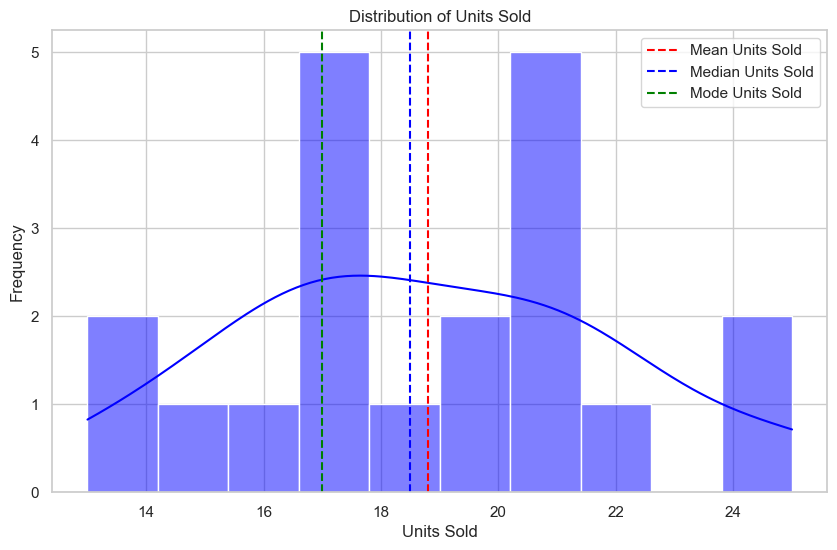

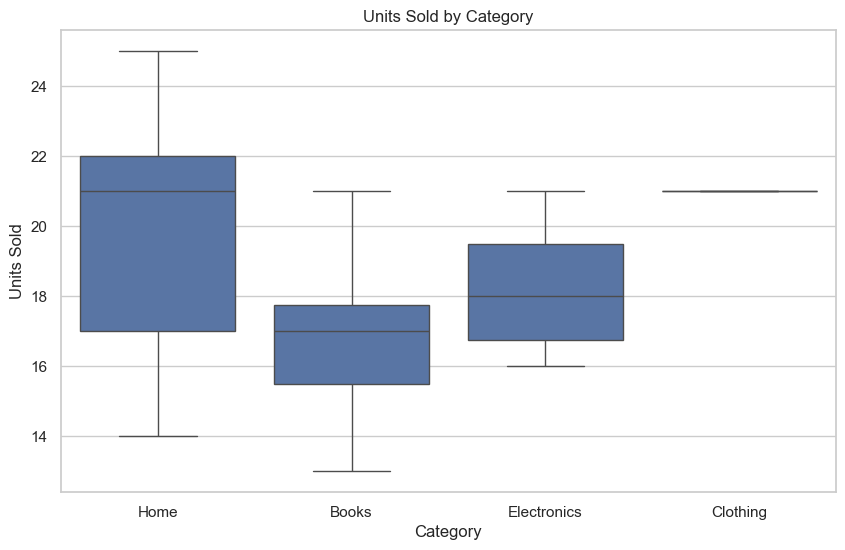

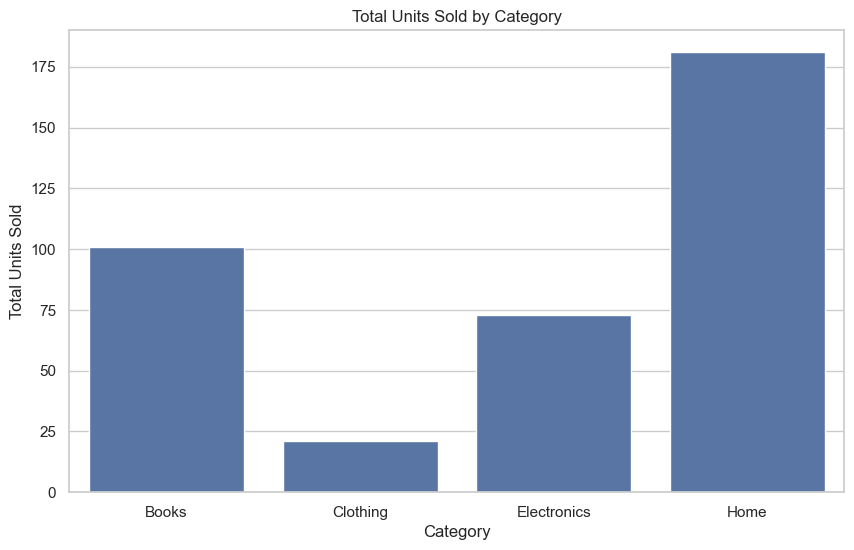

In [8]:
#visualization
sns.set(style='whitegrid')

#plotting the distribution of unit sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['unit_sold'], bins=10, kde=True, color='blue')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color='red', linestyle='--', label='Mean Units Sold')
plt.axvline(median_sales, color='blue', linestyle='--', label='Median Units Sold')
plt.axvline(mode_sales, color='green', linestyle='--', label='Mode Units Sold')
plt.legend()
plt.show()

#Boxplot to visualize unit sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='unit_sold', data=sales_data)
plt.title('Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

#Bar Plot for total unit sold by category
plt.figure(figsize=(10,6))
sns.barplot(x='category', y='sum', data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
